<a href="https://colab.research.google.com/github/Madhu2s6361/Artificail-Intelligenece-intern-Projects/blob/main/Cardiovascular_Diseases_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial intelligence Intern

Cardiovascular Diseases Prediction using Machine Learning

Definition: It is the application of machine learning (ML) algorithms to analyze patient health data (such as age, cholesterol, blood pressure, glucose levels, lifestyle habits, etc.) to predict the risk or presence of cardiovascular diseases (CVDs) like heart attack, stroke, or heart failure.

Why it’s important

Cardiovascular diseases are the leading cause of death worldwide.

Early detection can save lives by enabling timely intervention.

Traditional methods rely on manual interpretation (ECG, blood tests, clinical judgment), while ML can process large, complex datasets and find hidden patterns that humans may miss.

Dataset at kaggle https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset



 Cardiovascular Diseases: https://bigapollospectra.com/news/cardiovascular-disease-types-causes-and-symptoms



Concept

Input (Features): age, gender, cholesterol, blood pressure, smoking, BMI, glucose, etc.

Target (Label): cardio (1 = has cardiovascular disease, 0 = no disease).

Approach:

Perform EDA → clean + explore dataset.

Train/Test split.

Scale features.

Apply ML model (Logistic Regression, RandomForest, etc.).

Evaluate (Accuracy, Confusion Matrix, ROC).

In [630]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [631]:
pd.read_csv("cardioAI.csv")

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0
...,...
69995,99993;19240;2;168;76.0;120;80;1;1;1;0;1;0
69996,99995;22601;1;158;126.0;140;90;2;2;0;0;1;1
69997,99996;19066;2;183;105.0;180;90;3;1;0;1;0;1
69998,99998;22431;1;163;72.0;135;80;1;2;0;0;0;1


In [632]:
df= pd.read_csv("cardioAI.csv", sep=";")

In [633]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [634]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [635]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [636]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [637]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [638]:
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [639]:
df.dtypes

,0
id,int64
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64


In [640]:
df["bmi"]= df["weight"]/ ((df["height"]/100 ** 2))

In [641]:
df["bmi"]

,bmi
0,3690.476190
1,5448.717949
2,3878.787879
3,4852.071006
4,3589.743590
...,...
69995,4523.809524
69996,7974.683544
69997,5737.704918
69998,4417.177914


In [642]:
df["age_years"]= (df["age"]/365).astype(int)
df["age_years"]

,age_years
0,50
1,55
2,51
3,48
4,47
...,...
69995,52
69996,61
69997,52
69998,61


In [643]:
age_chol= df.groupby("age_years")["cholesterol"].mean().reset_index()
age_chol

,age_years,cholesterol
0,29,1.000000
1,30,1.000000
2,39,1.185955
3,40,1.173243
4,41,1.209669
5,42,1.167137
6,43,1.264894
7,44,1.204756
8,45,1.261620
9,46,1.220308


In [644]:
age_chol.head()

,age_years,cholesterol
0,29,1.000000
1,30,1.000000
2,39,1.185955
3,40,1.173243
4,41,1.209669


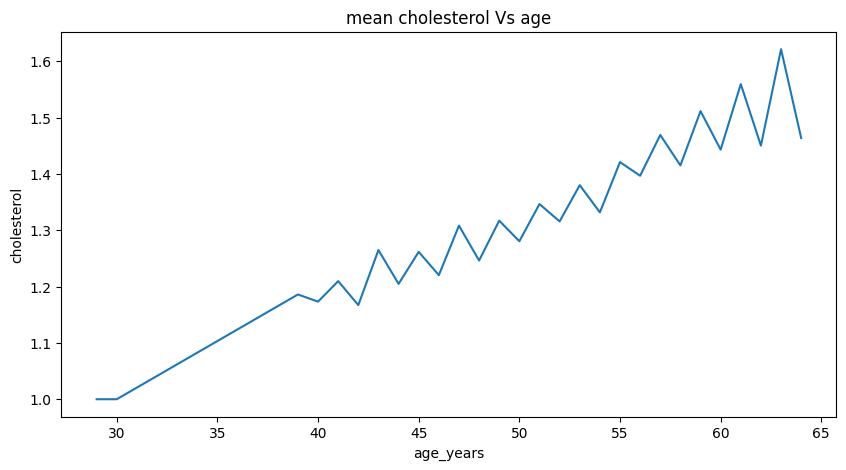

In [645]:
plt.figure(figsize=(10,5))
sns.lineplot(x="age_years", y="cholesterol", data= age_chol)
plt.title("mean cholesterol Vs age")
plt.show()

In [646]:
gender_cardio= df.groupby("gender")["cardio"].mean().reset_index()
gender_cardio

,gender,cardio
0,1,0.496727
1,2,0.505231


/tmp/ipython-input-674989992.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="gender", y="cardio", data=gender_cardio, palette="viridis")


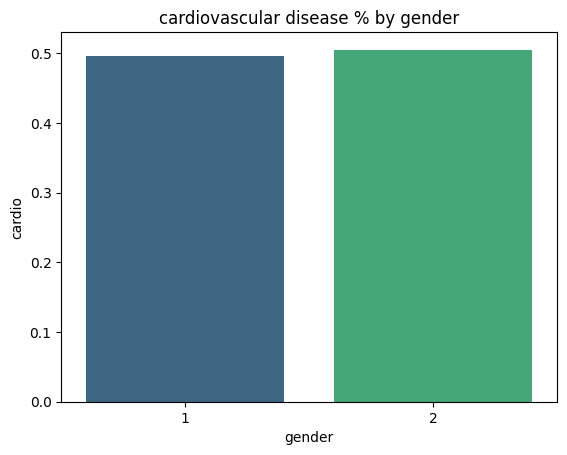

In [647]:
sns.barplot(x="gender", y="cardio", data=gender_cardio, palette="viridis")
plt.title("cardiovascular disease % by gender")
plt.show()

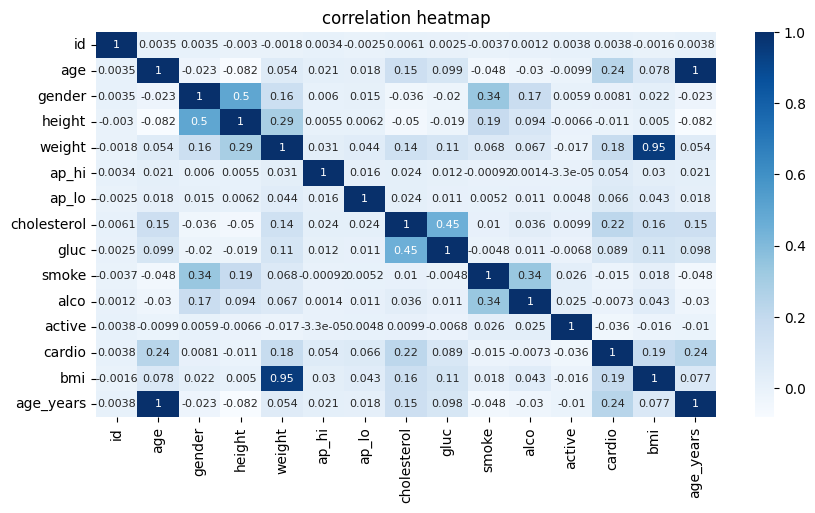

In [648]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap="Blues", annot_kws={"size": 8})
plt.title("correlation heatmap")
plt.show()

 It visually represents the correlation coefficients between all pairs of numerical columns in your dataset.

Each square in the heatmap shows the correlation between two variables.
The color of the square indicates the strength and direction of the correlation:
--->Darker blues indicate a stronger positive correlation (as one variable increases, the other tends to increase).

---->Lighter blues or white indicate a weaker or no correlation.
Red (if present in the colormap, though not in this 'Blues' map) would indicate a negative correlation (as one variable increases, the other tends to decrease).


--->The numbers within each square are the correlation coefficients, ranging from -1 to +1.
+1 means a perfect positive correlation.
-1 means a perfect negative correlation.
0 means no correlation.


---->The diagonal line of dark blue squares with '1.00' represents the correlation of each variable with itself, which is always perfect (1).


Looking at this heatmap, you can see how different features like age, weight, cholesterol, blood pressure (ap_hi, ap_lo), and others relate to each other and to the target variable cardio. This helps in understanding which features might be important predictors of cardiovascular disease. For example, you can see the correlation values between cardio and other features to get an initial idea of their relationship.



# Model Building

In [649]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [650]:
x= df[["age_years","gender","cholesterol","ap_hi","ap_lo","bmi","gluc","smoke","alco","active","bmi"]]
y= df["cardio"]

In [651]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)

In [652]:
# Feature Scaling
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [653]:
# LogisticRegression model
model= LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [654]:
# Prediction
y_pred= model.predict(x_train)

In [655]:
print("accuracy:",accuracy_score(y_train,y_pred))
print("confusion matrix:\n", confusion_matrix(y_train, y_pred))
print("classification report:\n", classification_report(y_train,y_pred))

accuracy: 0.7206071428571429
confusion matrix:
 [[21344  6673]
 [ 8973 19010]]
classification report:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73     28017
           1       0.74      0.68      0.71     27983

    accuracy                           0.72     56000
   macro avg       0.72      0.72      0.72     56000
weighted avg       0.72      0.72      0.72     56000



In [656]:
from sklearn.metrics import roc_curve, roc_auc_score

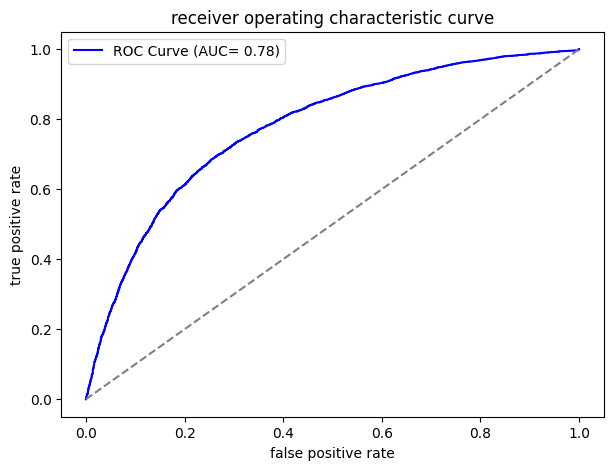

In [657]:
y_prob= model.predict_proba(x_test)[:,1]  # Probability for class 1
fpr, tpr, threshole= roc_curve(y_test,y_prob)
auc_score= roc_auc_score(y_test,y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label= f"ROC Curve (AUC= {auc_score:.2f})",color="blue")
plt.plot([0,1],[0,1],linestyle="--", color="gray")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("receiver operating characteristic curve")
plt.legend()
plt.show()

/tmp/ipython-input-3272038528.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")


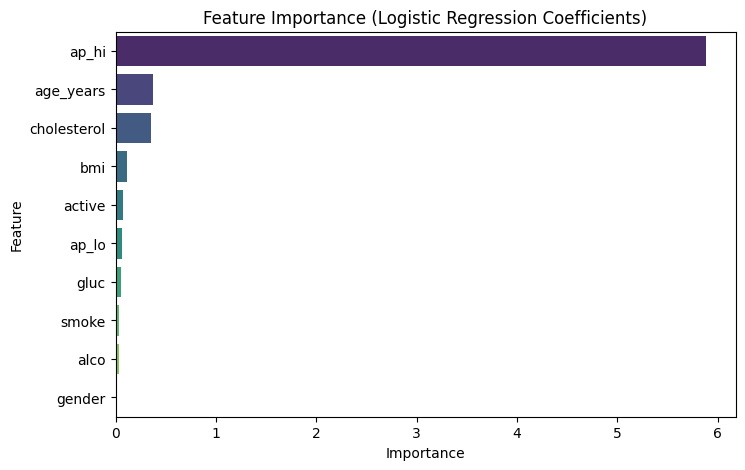

In [658]:
# Feature Importance

# Logistic Regression Feature Importance
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': abs(model.coef_[0])
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

In [659]:
# Ensure same feature order
new_patient= pd.DataFrame([{
    "age_years": 50,
    "gender":2, # male=2 , female=1
    "height":170,
    "weight":85,
    "bmi":85/(1.70**2),
    "ap_hi":140,
    "ap_lo":90,
    "cholesterol":2,
    "gluc":1,
    "smoke":0,
    "alco":0,
    "active":1
}])

# Match training features
new_patient_scaled= scaler.transform(new_patient[x.columns])

# Predict
prediction= model.predict(new_patient_scaled)
probability= model.predict_proba(new_patient_scaled)[:,1]

print("predicted class (0=NO CVD, 1=CVD):",prediction[0])
print("predicted probability of CVD:", probability[0])

predicted class (0=NO CVD, 1=CVD): 0
predicted probability of CVD: 0.3873878763777609


In [660]:
# Multiple patient records
patients = pd.DataFrame([
    {"age_years": 45, "gender": 1, "height": 160, "weight": 65,
     "bmi": 65 / (1.60**2), "ap_hi": 120, "ap_lo": 80,
     "cholesterol": 1, "gluc": 1, "smoke": 0, "alco": 0, "active": 1},

    {"age_years": 55, "gender": 2, "height": 175, "weight": 90,
     "bmi": 90 / (1.75**2), "ap_hi": 145, "ap_lo": 95,
     "cholesterol": 2, "gluc": 1, "smoke": 1, "alco": 0, "active": 0},

    {"age_years": 60, "gender": 1, "height": 162, "weight": 85,
     "bmi": 85 / (1.62**2), "ap_hi": 160, "ap_lo": 100,
     "cholesterol": 3, "gluc": 2, "smoke": 0, "alco": 1, "active": 0},

    {"age_years": 35, "gender": 2, "height": 180, "weight": 78,
     "bmi": 78 / (1.80**2), "ap_hi": 118, "ap_lo": 75,
     "cholesterol": 1, "gluc": 1, "smoke": 0, "alco": 0, "active": 1}
])


In [661]:
patients

,age_years,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,45,1,160,65,25.390625,120,80,1,1,0,0,1
1,55,2,175,90,29.387755,145,95,2,1,1,0,0
2,60,1,162,85,32.388355,160,100,3,2,0,1,0
3,35,2,180,78,24.074074,118,75,1,1,0,0,1


In [662]:
# Predict for All Patients

# Scale patients using the same scaler
patients_scaled = scaler.transform(patients[x.columns])

# Predictions
patients['Predicted_Class'] = model.predict(patients_scaled)
patients['CVD_Probability'] = model.predict_proba(patients_scaled)[:,1]

print(patients[['age_years','gender','ap_hi','ap_lo',
                'cholesterol','smoke','active',
                'Predicted_Class','CVD_Probability']])

   age_years  gender  ap_hi  ap_lo  cholesterol  smoke  active  \
0         45       1    120     80            1      0       1   
1         55       2    145     95            2      1       0   
2         60       1    160    100            3      0       0   
3         35       2    118     75            1      0       1   

   Predicted_Class  CVD_Probability  
0                0         0.116498  
1                1         0.514902  
2                1         0.777928  
3                0         0.067124  


/tmp/ipython-input-2076047816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=patients.index, y=patients["CVD_Probability"], palette="coolwarm")


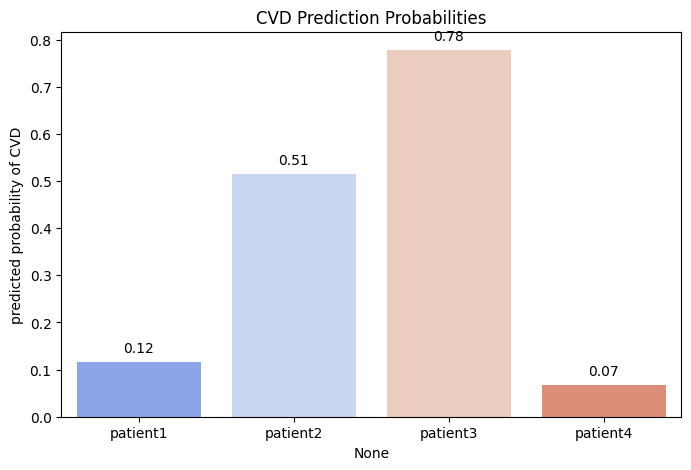

In [663]:
# Plot Graph of Predictions

# Bar plot for probabilities
plt.figure(figsize=(8,5))
sns.barplot(x=patients.index, y=patients["CVD_Probability"], palette="coolwarm")

# addlabels
for i, prob in enumerate(patients["CVD_Probability"]):
  plt.text(i, prob + 0.02, f"{prob:.2f}", ha="center") # add a small offset to display the text above the bars

plt.xticks(patients.index,[f"patient{i+1}" for i in patients.index])
plt.ylabel("predicted probability of CVD")
plt.title("CVD Prediction Probabilities")
plt.show()

In [664]:
# Predict on your test set

y_pred= model.predict(x_test)

# Compare actual vs predicted
result= pd.DataFrame({
    "actual": y_test.values,
    "predicted": y_pred
  })
print(result.tail(10)) # head() is the first'st 10nd rows and tail() is the last 10nd rows

       actual  predicted
13990       1          1
13991       0          0
13992       1          1
13993       0          0
13994       1          1
13995       0          1
13996       1          1
13997       0          1
13998       1          0
13999       1          1


In [665]:
# Predict probabilities

y_prob= model.predict_proba(x_test)[:,1]
result["risk_probability"]= y_prob
print(result.head(20))

    actual  predicted  risk_probability
0        0          0          0.357011
1        0          0          0.490590
2        0          0          0.401602
3        1          0          0.319395
4        1          0          0.365416
5        0          1          0.590043
6        1          0          0.440808
7        0          0          0.436530
8        0          0          0.225567
9        1          1          0.884918
10       1          1          0.743528
11       1          1          0.957605
12       0          0          0.499897
13       0          1          0.703525
14       0          1          0.518317
15       1          1          0.769302
16       1          1          0.546655
17       0          0          0.219828
18       1          1          0.729968
19       1          0          0.437387


/tmp/ipython-input-1310442584.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result.head(20).index, y=result.head(20)["risk_probability"], palette="coolwarm")


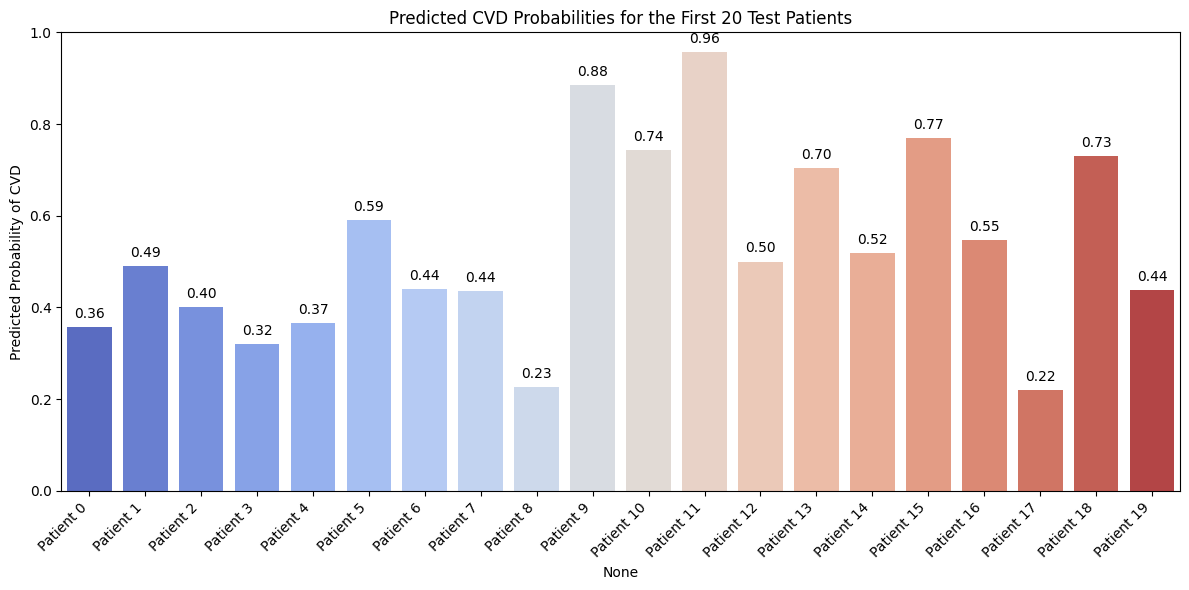

In [666]:
plt.figure(figsize=(12, 6))
sns.barplot(x=result.head(20).index, y=result.head(20)["risk_probability"], palette="coolwarm")

# Add labels to the bars
for i, prob in enumerate(result.head(20)["risk_probability"]):
    plt.text(i, prob + 0.02, f"{prob:.2f}", ha="center")

plt.xticks(result.head(20).index, [f"Patient {idx}" for idx in result.head(20).index], rotation=45, ha='right')
plt.ylabel("Predicted Probability of CVD")
plt.title("Predicted CVD Probabilities for the First 20 Test Patients")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

    actual  predicted  risk_probability
0        0          0          0.357011
1        0          0          0.490590
2        0          0          0.401602
3        1          0          0.319395
4        1          0          0.365416
5        0          1          0.590043
6        1          0          0.440808
7        0          0          0.436530
8        0          0          0.225567
9        1          1          0.884918
10       1          1          0.743528
11       1          1          0.957605
12       0          0          0.499897
13       0          1          0.703525
14       0          1          0.518317
15       1          1          0.769302
16       1          1          0.546655
17       0          0          0.219828
18       1          1          0.729968
19       1          0          0.437387


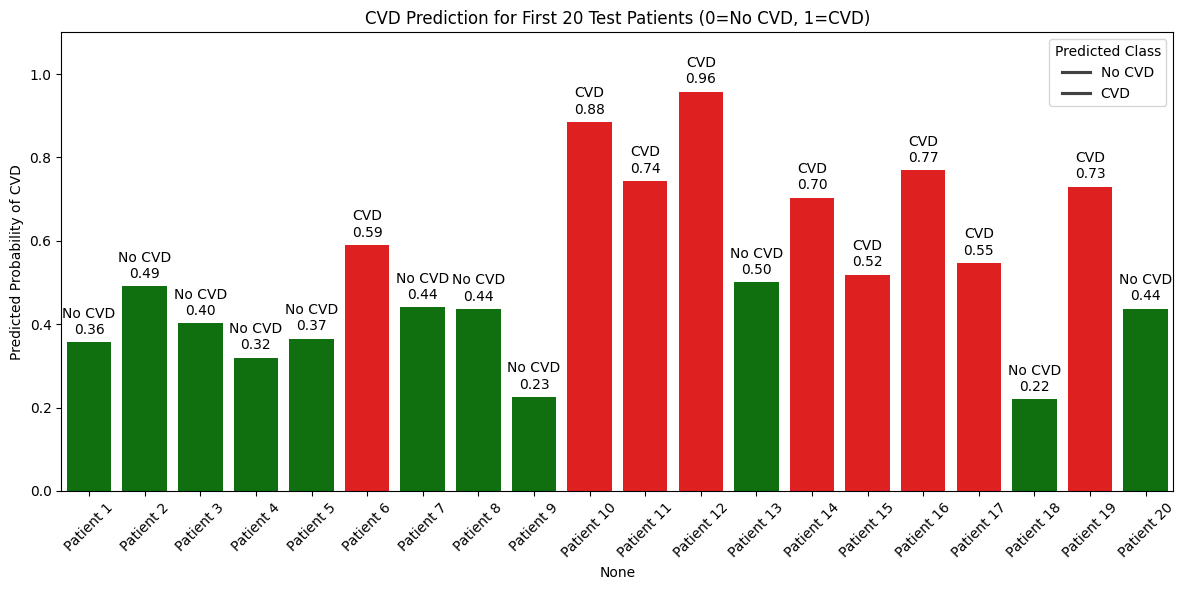

In [667]:
# Show actual vs predicted for first 20 test patients
print(result.head(20))

# Bar plot with class labels
plt.figure(figsize=(12,6))
sns.barplot(x=result.head(20).index,
            y=result.head(20)["risk_probability"],
            hue=result.head(20)["predicted"],
            palette={0:"green", 1:"red"})

# Add labels (CVD/No CVD + probability)
for i, (prob, cls) in enumerate(zip(result.head(20)["risk_probability"],
                                    result.head(20)["predicted"])):
    label = "No CVD" if cls==0 else "CVD"
    plt.text(i, prob+0.02, f"{label}\n{prob:.2f}", ha="center")

plt.xticks(result.head(20).index, [f"Patient {i+1}" for i in result.head(20).index], rotation=45)
plt.ylabel("Predicted Probability of CVD")
plt.title("CVD Prediction for First 20 Test Patients (0=No CVD, 1=CVD)")
plt.ylim(0, 1.1)
plt.legend(title="Predicted Class", labels=["No CVD", "CVD"])
plt.tight_layout()
plt.show()


/tmp/ipython-input-2096914017.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='actual', y='risk_probability', data=result.groupby('actual')['risk_probability'].mean().reset_index(), palette='viridis')


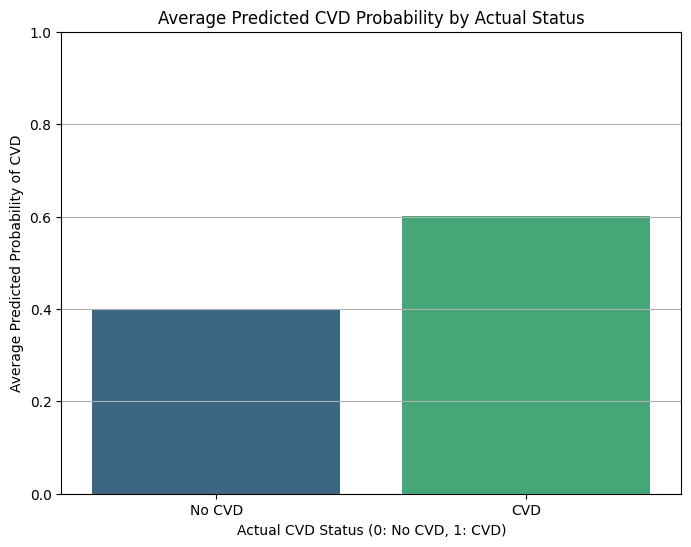

In [668]:
plt.figure(figsize=(8, 6))
sns.barplot(x='actual', y='risk_probability', data=result.groupby('actual')['risk_probability'].mean().reset_index(), palette='viridis')
plt.title('Average Predicted CVD Probability by Actual Status')
plt.xlabel('Actual CVD Status (0: No CVD, 1: CVD)')
plt.ylabel('Average Predicted Probability of CVD')
plt.xticks([0, 1], ['No CVD', 'CVD'])
plt.ylim(0, 1) # Probabilities are between 0 and 1
plt.grid(axis='y')
plt.show()

In [669]:
# After generating predictions on your test set
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]

# Create a result DataFrame
result = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred,
    "Risk_Probability": y_prob
})

In [670]:
# Ensure the order matches training
feature_order = ['age_years','gender','cholesterol','ap_hi','ap_lo','bmi','gluc',
                 'smoke','alco','active','bmi'] # Corrected feature order

In [671]:
# Select features and convert to NumPy
new_patient_array = new_patient[feature_order].values  # <-- NumPy array

In [672]:
# Transform using the same scaler
patients_scaled = scaler.transform(patients_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [673]:
# Predict
future_pred = model.predict(patients_scaled)
future_prob = model.predict_proba(patients_scaled)[:,1]

In [674]:
print("Future Prediction:", "Disease" if future_pred[0]==1 else "No Disease")
print("Risk Probability:", future_prob[0])

Future Prediction: No Disease
Risk Probability: 7.09176936630684e-05


In [675]:
# Map predicted class to descriptive labels
patients['Predicted_Status'] = patients['Predicted_Class'].map({0: 'No Disease', 1: 'Disease'})

print(patients[['age_years','gender','ap_hi','ap_lo',
                'cholesterol','smoke','active',
                'Predicted_Class','Predicted_Status','CVD_Probability']])

   age_years  gender  ap_hi  ap_lo  cholesterol  smoke  active  \
0         45       1    120     80            1      0       1   
1         55       2    145     95            2      1       0   
2         60       1    160    100            3      0       0   
3         35       2    118     75            1      0       1   

   Predicted_Class Predicted_Status  CVD_Probability  
0                0       No Disease         0.116498  
1                1          Disease         0.514902  
2                1          Disease         0.777928  
3                0       No Disease         0.067124  


In [676]:
# Display first 50 patients
patients_subset = patients[['age_years','gender','Predicted_Status','CVD_Probability']].head(50)
print(patients_subset)



   age_years  gender Predicted_Status  CVD_Probability
0         45       1       No Disease         0.116498
1         55       2          Disease         0.514902
2         60       1          Disease         0.777928
3         35       2       No Disease         0.067124


/tmp/ipython-input-1563577240.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=patients_50.index, y=patients_50['CVD_Probability'], palette="coolwarm")


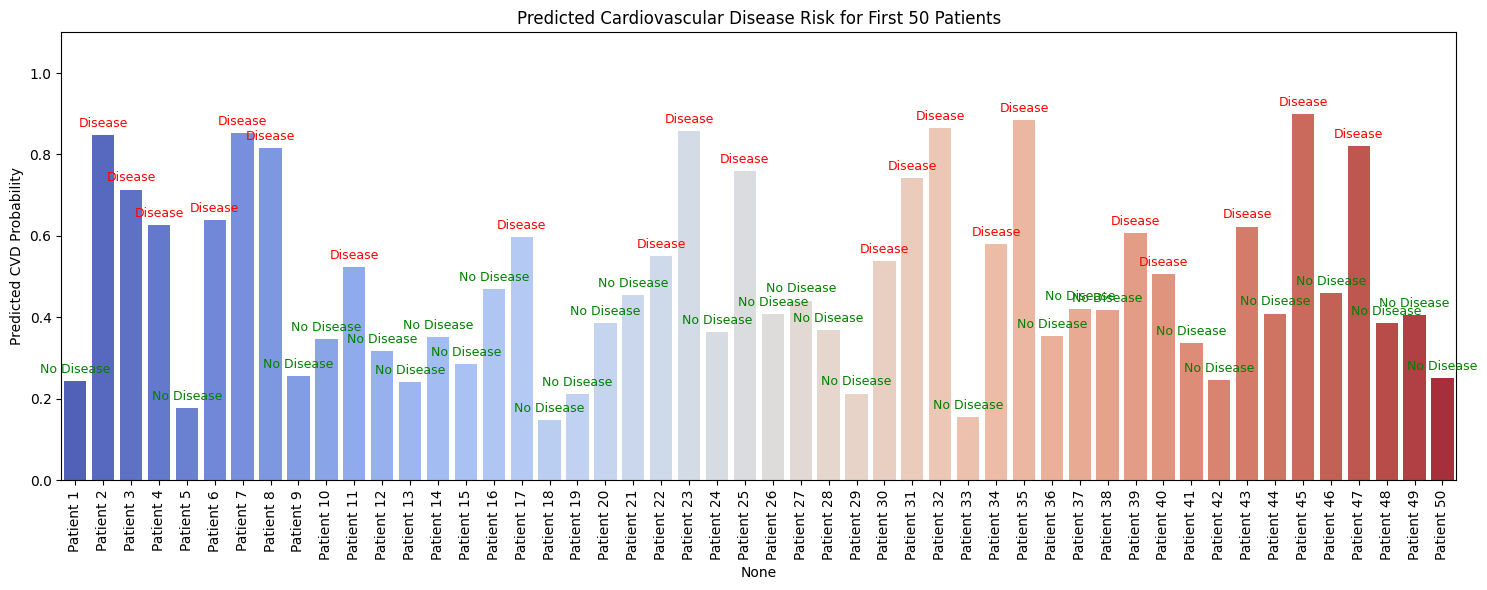

In [677]:
# Take first 50 patients from your dataset and predict
patients_50 = df.head(50).copy()

# Scale
patients_scaled = scaler.transform(patients_50[x.columns])

# Predictions
patients_50["Predicted_Class"] = model.predict(patients_scaled)
patients_50["CVD_Probability"] = model.predict_proba(patients_scaled)[:,1]

# Plot bar chart
plt.figure(figsize=(15,6))
sns.barplot(x=patients_50.index, y=patients_50['CVD_Probability'], palette="coolwarm")

# Add labels (Disease / No Disease) on top
for i, prob in enumerate(patients_50['CVD_Probability']):
    label = "Disease" if patients_50['Predicted_Class'].iloc[i] == 1 else "No Disease"
    plt.text(i, prob + 0.02, label, ha='center',
             color=('red' if label=="Disease" else 'green'),
             fontsize=9)

plt.xticks(patients_50.index, [f"Patient {i+1}" for i in patients_50.index], rotation=90)
plt.ylabel("Predicted CVD Probability")
plt.title("Predicted Cardiovascular Disease Risk for First 50 Patients")
plt.ylim(0,1.1)
plt.tight_layout()
plt.show()


In [678]:
# Map predictions to "Disease"/"No Disease"
result["Prediction_Label"] = result["Predicted"].map({0: "No Disease", 1: "Disease"})


In [679]:
result["Prediction_Label"]

,Prediction_Label
0,No Disease
1,No Disease
2,No Disease
3,No Disease
4,No Disease
...,...
13995,Disease
13996,Disease
13997,Disease
13998,No Disease


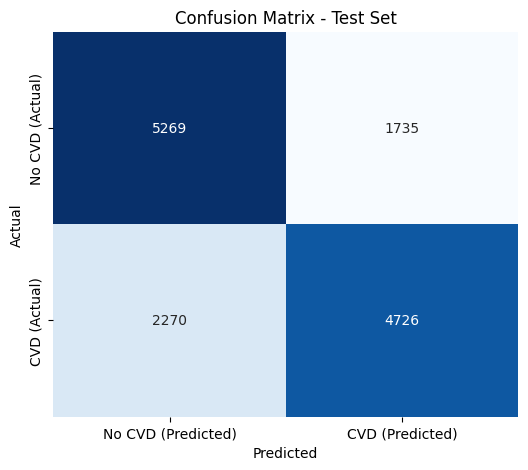

In [680]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No CVD (Predicted)", "CVD (Predicted)"],
            yticklabels=["No CVD (Actual)", "CVD (Actual)"])

plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Classification Report:
               precision    recall  f1-score       support
0              0.698899  0.752284  0.724610   7004.000000
1              0.731466  0.675529  0.702385   6996.000000
accuracy       0.713929  0.713929  0.713929      0.713929
macro avg      0.715182  0.713907  0.713498  14000.000000
weighted avg   0.715173  0.713929  0.713504  14000.000000


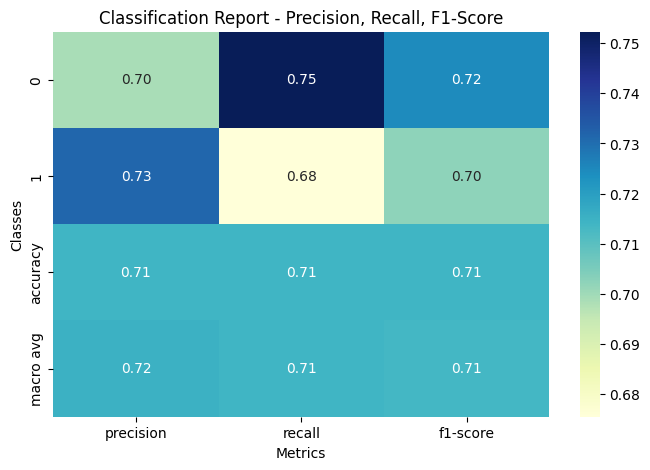

In [681]:
from sklearn.metrics import classification_report

# Get classification report as dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

print("Classification Report:\n", report_df)

# Plot as heatmap
plt.figure(figsize=(8,5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report - Precision, Recall, F1-Score")
plt.ylabel("Classes")
plt.xlabel("Metrics")
plt.show()


In [682]:
# Save as PNG
plt.savefig("CVD_Model_Evaluation_Dashboard.png", dpi=300, bbox_inches="tight")

# Save as PDF
plt.savefig("CVD_Model_Evaluation_Dashboard.pdf", bbox_inches="tight")

plt.show()
print("✅ Dashboard saved as PNG and PDF!")


<Figure size 640x480 with 0 Axes>

✅ Dashboard saved as PNG and PDF!


In [683]:
# Save to Excel
output_file = "CVD_Predictions.xlsx"
result.to_excel(output_file, index=False)

print(f"Predictions saved to {output_file}")

Predictions saved to CVD_Predictions.xlsx


In [684]:
# Save Predictions
# Save patient predictions
patients.to_excel("CVD_Custom_Patients.xlsx", index=False)

# Save test set predictions
result.to_excel("CVD_TestSet_Predictions.xlsx", index=False)


In [685]:
# Save All Results into One Excel File
with pd.ExcelWriter("CVD_Model_Results.xlsx", engine="openpyxl") as writer:
    # Sheet 1 - Custom patients
    patients.to_excel(writer, sheet_name="Custom Patients", index=False)

    # Sheet 2 - Test predictions
    result.to_excel(writer, sheet_name="Test Predictions", index=False)

    # Sheet 3 - Classification report
    report_df.to_excel(writer, sheet_name="Classification Report")

    # Sheet 4 - Feature importance
    feature_importance.to_excel(writer, sheet_name="Feature Importance", index=False)


In [686]:
import os
print(os.getcwd())   # shows working folder


/content


In [687]:
os.listdir()


['.config',
 'CVD_TestSet_Predictions.xlsx',
 'CVD_Model_Evaluation_Dashboard.png',
 'CVD_Predictions.xlsx',
 'CVD_Custom_Patients.xlsx',
 'CVD_Model_Results_With_Plots.xlsx',
 'CVD_Model_Results.xlsx',
 'cardioAI.csv',
 'CVD_Model_Evaluation_Dashboard.pdf',
 'CVD_Dashboard.png',
 'sample_data']

In [688]:
from google.colab import files
files.download("CVD_Model_Results.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>